# Milestone 2 Assignment - Capstone Check-in

## Author - Elizabeth Lunsford

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## Tasks
<img src="https://library.startlearninglabs.uw.edu/DATASCI420/img/Milestone2Sample.PNG" style="float: right; width: 400px;">
For this check-in, you are to:

1). Explicitly state the problem, list sources, and define the methodology: classification, regression, other

2). List data processing steps (psuedo code) including steps from data source collection & preparation, feature engineering & selection, modeling, performance evaluation.

3). Read in the previously generated data file of cleaned up data

4). Perform feature engineering and selection

5). Conduct some preliminary modeling 

6). Identify potential machine learning model(s) to improve performance


## Project Goal

### Project Goal
The goal of this project is to predict if a state votes for a Republican or Democratic candidiate.

### Problem Statement
How much does a state's social demographics influence how a state votes?  
 
### Problem Definition
Understanding how the United States of America is governed is a complex problem. Simply described as a democracy where people vote for elected officials is an overgeneralization for the constitutional federal republic which is governed by three branches; executive, legislative and judicial. The judicial branch ensures that implemented laws are in accordance with the constitution that can be either places by the executive or legislative branches.

Each state has its own constitution and form of government that is also structured with executive, legislative and judicial branch. A republic is a form of government in which the people elect representatives. In the United States, people elect officials into the legislative branches based on popular vote. The Federal Executive branch which included the President and Vice President of the United States is elected by an electoral college. The electoral college mainly consists of two political parties; the Democratic and Republican Party

The republic is not required to vote or align themselves to a political party. Therefore voter turnout is a dynamic variable and a state’s political majority can change at every election. To help understand how the United States is govern, we will study if social demographics have an influence on how people vote. Using Machine Learning Algorithms, we will create model to predict each state’s range of voter turnout and which party will be elected in federal elections.

### List of Raw Data Sources
* United States Presidential Election Results Data Set: "https://uselectionatlas.org/RESULTS/"
* United States Legislative Branch Party Composition: https://www.kaggle.com/kiwiphrases/partystrengthbystate#states_party_strength_cleaned.csv
* Employment / unemployment data: https://data.bls.gov/PDQWeb/la
*  Poverty and income estimates data: https://www.census.gov/data-tools/demo/saipe/saipe.html?s_appName=saipe&menu=grid_proxy&s_USStOnly=y&map_yearSelector=2016&map_geoSelector=aa_c&s_measures=aa_snc
* Education Spending per student, 2016 dollars, by state, 2007-2016, (Pre-K through 12): http://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html
* National Public Education Financial Survey Data (Pre-K through 12):https://nces.ed.gov/ccd/stfis.asp

### List of Data Sources from Milestone 1 to use for Milestone 2
* political_data.csv - Election data
* final_dataset.csv - Demographic data
* state_edu_spending.csv - Educational Finance data

### Methodology
* Classification of if a state votes Republican or Democrat.

## Data Processing Steps
###  List data processing steps (psuedo code) including steps from data source collection & preparation, feature engineering & selection, modeling, performance evaluation.
1. Data Source Collection and Preparartion
 1. Load three data files into dataframes
    1. Process each dataframe to have the same names for state and year
    1. Merge dataframes based on state and year
 2. Analysis and Process combined dataframe
    2. Drop duplicate entries, create key fields, and create flag field noting combine participation
 3. Clean the target value 
2. Select Feature Method
3. Evalute Method

### Read in the previously generated data file of cleaned up data

In [1424]:
# Import libraries
import pandas as pd
import numpy as np
import pandas_profiling
from scipy import stats
from sklearn import preprocessing

# Read data files into dataframes
df_p = pd.read_csv("political_data.csv", header=0)
df_d = pd.read_csv("final_dataset.csv", header=0)
df_e = pd.read_csv("state_edu_spending.csv", header=0)

### View political data

In [1425]:
# Most political data attributes are leakage to the target value since they are the results of
#  other political seats election results, therefore only use the following values
df_p = df_p[['year', 'state', 'population', 'total_vap', 'perc_vap', 'perc_reg', 'd_placed', 'r_placed']]

# Keep first place as 1 but convert second place as 0, there 1 would be win and 0 would be lost
df_p['d_placed'] = df_p.d_placed.replace(2,0)
df_p['r_placed'] = df_p.r_placed.replace(2,0)

# 3rd values means a third party came in first or second place
# If a value is 3, that means the did not come in first or win, so convert 3 to 0 which means lost
df_p['d_placed'] = df_p.d_placed.replace(3,0)
df_p['r_placed'] = df_p.r_placed.replace(3,0)

df_p['d_won'] = df_p['d_placed']
df_p = df_p.drop(['d_placed', 'r_placed'], axis =1)

# View political data
#pandas_profiling.ProfileReport(df_p)

### View educational data

In [1426]:
#pandas_profiling.ProfileReport(df_e)

In [1427]:
# Instruction_expensive is highly coordinated enough with total_edu_expense to be dropped
df_e = df_e.drop(['instruction_expense'], axis =1 )

### View demographic data

In [1428]:
#pandas_profiling.ProfileReport(df_d)

In [1429]:
df_d = df_d[['All Ages in Poverty Percent', 'Median Household Income in Dollars', 'State', 'Year', 'labor force', 'unemployment rate']]

In [1430]:
# Rename columns to shorter names
df_d = df_d.rename(columns={
'All Ages in Poverty Percent': 'poverty',
'Median Household Income in Dollars': 'income',
'labor force': 'labor',
'unemployment rate': 'unemployment' })

# Make all column names lowercase
df_d = df_d.rename(columns=str.lower)

In [1431]:
#### Impute missing values with mean values
# Each state value will have it's own mean
# Loop through each state and impute variables with missing values
states = df_d.state.unique()
attributes = ["income", "poverty"]
for state in states:
    for attribute in attributes:
        #df_d[attribute] = df_d[attribute].replace("-", 0).astype(float)
        mean_value = df_d.loc[(df_d["state"] == state) & (df_d[attribute] > 0), attribute].values.mean()
        df_d.loc[((df_d["state"] == state) & (df_d[attribute] == 0)), [attribute]] = mean_value 
        df_d[attribute] = df_d[attribute].fillna(mean_value)

### Clean that state values

In [1432]:
# Make all state values lowercase
df_p['state'] = df_p.state.str.lower()
df_d['state'] = df_d.state.str.lower()
df_e['state'] = df_e.state.str.lower()

# Check state data in political dataset
# sorted(df_p.state.unique())

In [1433]:
# Compare political dataset to demographic dataset
print(np.setdiff1d(df_d.state.unique(), df_p.state.unique()))

# Compare political dataset to educational dataset
print(np.setdiff1d(df_e.state.unique(), df_p.state.unique()))

['district of columbia' 'puerto rico']
['american samoa' 'american somoa' 'district of columbia' 'guam'
 'northern mariana islands' 'northern marianas' 'puerto rico'
 'virgin islands']


In [1434]:
# Make d.c. data values that same in all three datasets
df_p['state'] = df_p.state.replace('d.c.', 'district of columbia')

### Clean the year data up

In [1435]:
print(
'  political data', df_p.year.max(), df_p.year.min(), '\n',
'educational data', df_e.year.max(), df_e.year.min(), '\n',
'demographic data', df_d.year.max(), df_d.year.min())

  political data 2016 1980 
 educational data 2016 2000 
 demographic data 2017 1976


In [1436]:
df_pd = pd.merge(df_p,df_d, on=['state','year'])
df = pd.merge(df_pd, df_e, on =['state', 'year'])
#df.describe

In [1437]:
# encode state
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(df.state)
df['state'] = le.transform(df.state)

In [1438]:
# check for nulls
df[df.isnull().any(axis=1)].head()

,year,state,population,total_vap,perc_vap,perc_reg,d_won,poverty,income,labor,unemployment,total_revenue,property_expense,total_edu_expense,per_pupil_expense


## Preprocessing for Models

In [1439]:
# Create training and data set with normalized data
from sklearn.model_selection import train_test_split
y = df.d_won
X = df.drop('d_won', axis=1)


# Normalize the data from sklearn 
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# x is for features, y is for targets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [1440]:
names = X.columns

## Feature Engineering and Selection

### SelectKBest
SelectKBest Feature Selection will be used under Run Model

In [1441]:
from sklearn.feature_selection import SelectKBest

#Funtion to retrieve K feature from SelectKBest
def Features_from_SelectKBest(try_k):
    # extract try_k best features
    # score_func=f_classif,
    skb = SelectKBest(k=try_k,  score_func=f_classif)
    
    # use those features to fit your model
    fit = skb.fit(X_train, y_train)
    
    #Make training set with just those featurs
    mask = fit.get_support()
    k_set = X.columns[mask]
    return k_set

### Backward Model Selection
Backward Model Feature Selection will be used under Run Model

In [1442]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE #Recursive Feature Elimination

def Backward_Model_Selection(model, amount_to_keep):
    estimator = model()
    selector = RFE(estimator, amount_to_keep, step=1) # keep five and remove variables one at a time (step) 
    selector = selector.fit(X_train, y_train)        # fit the model with the five kept features
   
    fit.get_support
    mask = selector.support_            # show which are kept (True) and which are removed (False)
    return X.columns[mask]            # show in what order they were removed highest removed first

### Forward Stepwise Selection

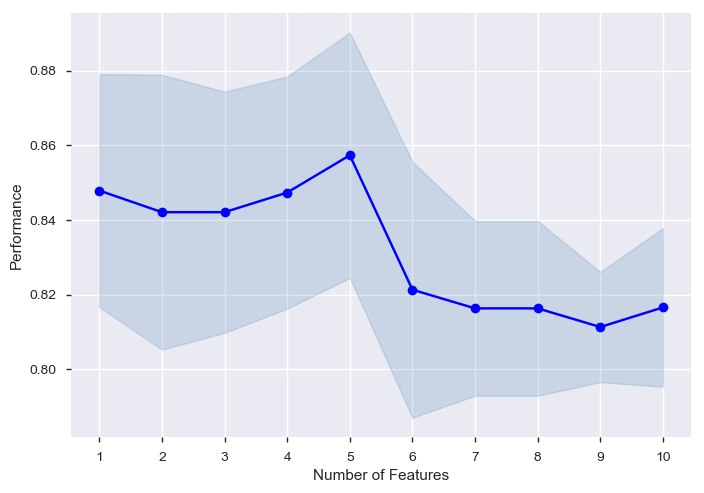

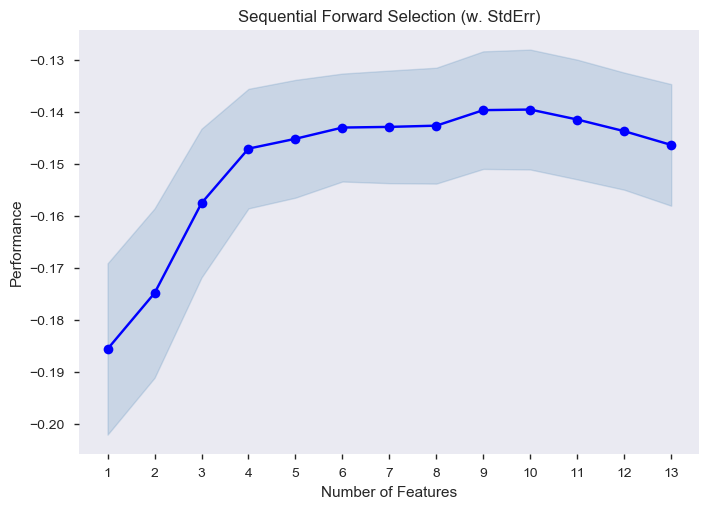

In [1443]:
# Forward Stepwise Feature Selection with LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(X_train.shape[1]-1), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

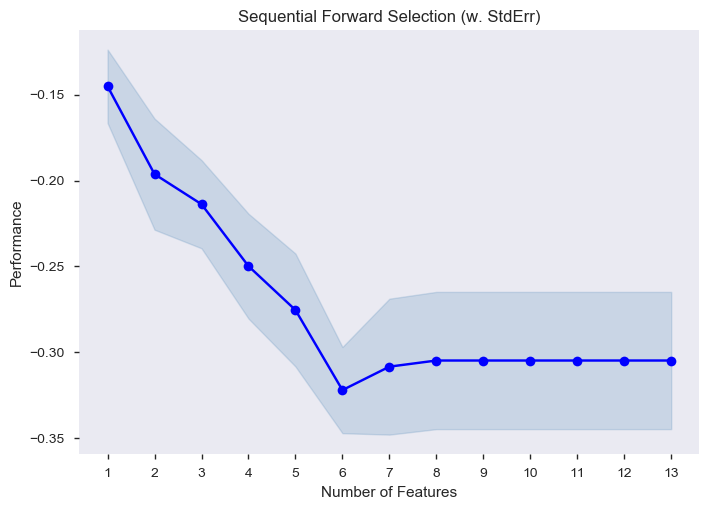

In [1444]:
# Forward Stepwise Feature Selection with DecisionTreeClassier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

sfs = SFS(knn, 
          k_features=(X_train.shape[1]-1), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Sequential Forward Selection in the linear regression worked well adding more features.
Sequential Forward Selection in the classification worked best with a few features and poorer adding more features.

### LASSO, Ridge and ElasticNet Regression

#### Lasso

In [1445]:
# Create a function called lasso,
def compare_lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = X.columns
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = linear_model.Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [1446]:
# Run the function called, Lasso
compare_lasso([.01, .05, .1, .5])

/Users/elunsford/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.010000,Alpha = 0.050000,Alpha = 0.100000,Alpha = 0.500000
0,year,-4.011705e-02,-3.350262e-02,-2.546830e-02,-0.000000e+00
1,state,2.140379e-03,1.292181e-03,2.887273e-04,-0.000000e+00
2,population,-1.030923e-07,-1.253503e-07,-1.524740e-07,-3.041881e-07
3,total_vap,2.526445e-08,2.133547e-08,1.697158e-08,3.614539e-08
4,perc_vap,9.302865e-03,6.695326e-03,3.728172e-03,0.000000e+00
5,perc_reg,-4.235596e-03,-2.094250e-03,-0.000000e+00,0.000000e+00
6,poverty,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
7,income,3.058319e-05,2.688252e-05,2.251781e-05,1.234612e-05
8,labor,2.606230e-07,3.151475e-07,3.819013e-07,6.764390e-07
9,unemployment,7.118912e-02,4.693546e-02,1.676682e-02,0.000000e+00


In [1447]:
# LASSO
from sklearn import linear_model

## From the results above, alpha set as .05 appears to be appropriate
alpha = .05 # Increasing alpha can shrink more variable coefficients to 0

#make model
clf = linear_model.Lasso(alpha=alpha)
lasso_fs = clf.fit(X_train, y_train)

# Select features that do not have a coef of 0
mask = lasso_fs.coef_ != 0
lasso_feature_set =  X.columns[mask]
lasso_feature_set.values

/Users/elunsford/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array(['year', 'state', 'population', 'total_vap', 'perc_vap', 'perc_reg',
       'income', 'labor', 'unemployment', 'total_revenue',
       'property_expense', 'total_edu_expense', 'per_pupil_expense'], dtype=object)

#### Ridge

In [1448]:
# Create a function called lasso,
def compare_ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = X.columns
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge = linear_model.Ridge(alpha=alpha)
        
        # Fit the lasso regression
        ridge.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the datafram    
    return df

In [1449]:
# Run the function called, Lasso
alphas = [.001, .05, .1, 5]
compare_ridge(alphas)

,Feature Name,Alpha = 0.001000,Alpha = 0.050000,Alpha = 0.100000,Alpha = 5.000000
0,year,-3.134728e-02,-3.134685e-02,-3.134641e-02,-3.130203e-02
1,state,1.360555e-03,1.360448e-03,1.360339e-03,1.349692e-03
2,population,-3.466188e-07,-3.466273e-07,-3.466359e-07,-3.474684e-07
3,total_vap,1.046928e-08,1.046800e-08,1.046670e-08,1.034147e-08
4,perc_vap,7.769637e-03,7.769560e-03,7.769481e-03,7.761364e-03
5,perc_reg,-4.068508e-03,-4.068340e-03,-4.068169e-03,-4.051566e-03
6,poverty,6.322705e-03,6.324953e-03,6.327246e-03,6.545013e-03
7,income,2.433415e-05,2.433400e-05,2.433384e-05,2.431740e-05
8,labor,7.606530e-07,7.606728e-07,7.606930e-07,7.626405e-07
9,unemployment,6.236186e-02,6.235456e-02,6.234710e-02,6.162753e-02


In [1450]:
# Ridge Regression
from sklearn import linear_model
alpha = .5
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

[ -3.13429161e-02   1.35946813e-03  -3.46704723e-07   1.04563173e-08
   7.76884643e-03  -4.06680165e-03   6.34553430e-03   2.43325846e-05
   7.60854099e-07   6.22875505e-02  -2.62455820e-11  -1.20244403e-10
   1.67781695e-11   4.37573986e-05]
61.005184007
Sum of square of coefficients = 0.00


In [1451]:
# ElasticNet
from sklearn.linear_model import ElasticNet
alpha = .05
clf = linear_model.ElasticNet(alpha=alpha)
enet = clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)
lasso_fs = clf.fit(X_train, y_train)
mask = enet.coef_ != 0

enet_feature_set =  X.columns[mask]
enet_feature_set

[ -3.74497198e-02   1.80132628e-03  -1.12449039e-07   2.35903153e-08
   8.28263316e-03  -3.41043416e-03  -0.00000000e+00   2.90877064e-05
   2.83573596e-07   6.12363726e-02  -1.14663631e-11  -3.35723564e-11
  -3.99945967e-12   4.96089112e-05]
72.9812924474


/Users/elunsford/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Index(['year', 'state', 'population', 'total_vap', 'perc_vap', 'perc_reg',
       'income', 'labor', 'unemployment', 'total_revenue', 'property_expense',
       'total_edu_expense', 'per_pupil_expense'],
      dtype='object')

## Preliminary Data Model



### Model Performance Evaluation

In [1452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [1453]:
#s seon
def Run_Decision_Tree_Model_with_feature_set(feature_set):
    # make the model
    dec_tree_ent = DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(X_train.loc[:,feature_set],y_train)
    
    #run the model
    y_predict = dec_tree_ent.predict(X_test.loc[:,feature_set])

    #return the accuracy of the model
    return (accuracy_score(y_test, y_predict) * 100)

def Run_RandomForest_with_feature_set(feature_set):
    nTrees = 100
    max_depth = 5
    min_node_size = 5
    verbose = 0
    
    clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
    clf.fit(X_train.loc[:, feature_set], y_train)
    
    #Predict
    y_predict = clf.predict(X_test.loc[:, feature_set])
    
    #return the accuracy of the model
    return (accuracy_score(y_test, y_predict) * 100)

def Run_GradientBoostingClassifer_with_feature_set(feature_set):
    nTrees = 100
    max_depth = 5
    min_node_size = 5
    verbose = 0
    learning_rate = 0.05
    
    gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                    min_samples_leaf=min_node_size)
    gbm_clf.fit(X_train.loc[:, feature_set], y_train)

    y_predict = gbm_clf.predict(X_test.loc[:, feature_set])
    
    #return the accuracy of the model
    return (accuracy_score(y_test, y_predict) * 100)

In [1454]:
# Make functions to run models with X amount of features
def DecisionTree_with_SelectKBest(try_k):
    # Get K Features with SelectKBest
    feature_set = Features_from_SelectKBest(try_k)
    results = Run_Decision_Tree_Model_with_feature_set(feature_set)
    return [results, 'decision_tree', 'selectKBest', feature_set.values]
    
def DecisionTree_with_Backward_Model(try_k):
    feature_set = Backward_Model_Selection(DecisionTreeClassifier, x)
    results = Run_Decision_Tree_Model_with_feature_set(feature_set)
    return [results, 'decision_tree', 'Backward_Model', feature_set.values]
    
# Make function to run RandomForest
def RandomForest_with_SelectKBest(try_k):
    k_set = Features_from_SelectKBest(try_k)
    results = Run_RandomForest_with_feature_set(k_set)
    return [results, 'RandomForest', 'SelectKBest', k_set.values]

# Make function to run RandomForest
def RandomForest_with_BackwardFS(try_k):
    k_set = Backward_Model_Selection(DecisionTreeClassifier, try_k)
    results = Run_RandomForest_with_feature_set(k_set)
    return [results, 'RandomForest', 'Backward', k_set.values]

# Make Function to Run Random Forest
def GradientBoostingClassifier_with_SelectKBest(try_k): 
    feature_set = Features_from_SelectKBest(try_k)
    results = Run_GradientBoostingClassifer_with_feature_set(feature_set)
    return [results, 'GrandientBoostingClassier', 'SelectKBest', feature_set.values]

# Make Function to Run Random Forest
def GradientBoostingClassifier_with_BackwardFS(try_k): 
    feature_set = Backward_Model_Selection(DecisionTreeClassifier, try_k)
    results = Run_GradientBoostingClassifer_with_feature_set(feature_set)
    return [results, 'GrandientBoostingClassier', 'Backward', feature_set.values]

## Run the models
### Decision Trees, Random Forest and Gradient Boost

In [1455]:
all_results = pd.DataFrame(columns=['model','fs','k','accuracy','features'])

models = [DecisionTree_with_SelectKBest,
          DecisionTree_with_Backward_Model,
          RandomForest_with_SelectKBest,
          GradientBoostingClassifier_with_SelectKBest]

for m in models:
    for x in range(1 , X_train.shape[1]+1):
        results = m(x) 
        row = pd.DataFrame({'model':[results[1]],
                        'fs':[results[2]],
                        'k':[x],
                        'accuracy' :[results[0]],
                        'features': [[results[3]]]})
        all_results = all_results.append(row)

all_results.sort_values(by = 'accuracy',ascending=False)

,model,fs,k,accuracy,features
0,GrandientBoostingClassier,SelectKBest,2,85.964912,"[[income, per_pupil_expense]]"
0,GrandientBoostingClassier,SelectKBest,14,80.701754,"[[year, state, population, total_vap, perc_vap..."
0,GrandientBoostingClassier,SelectKBest,13,80.701754,"[[year, population, total_vap, perc_vap, perc_..."
0,decision_tree,Backward_Model,2,80.701754,"[[perc_reg, per_pupil_expense]]"
0,RandomForest,SelectKBest,11,80.701754,"[[population, total_vap, perc_vap, perc_reg, p..."
0,RandomForest,SelectKBest,4,78.947368,"[[poverty, income, total_revenue, per_pupil_ex..."
0,decision_tree,Backward_Model,10,78.947368,"[[year, population, total_vap, perc_reg, pover..."
0,decision_tree,Backward_Model,11,78.947368,"[[year, total_vap, perc_vap, perc_reg, poverty..."
0,decision_tree,Backward_Model,12,78.947368,"[[year, population, total_vap, perc_reg, pover..."
0,decision_tree,Backward_Model,13,78.947368,"[[year, population, total_vap, perc_vap, perc_..."


In [1456]:
# Run tree models with lasso feature     
dtc = Run_Decision_Tree_Model_with_feature_set(lasso_feature_set)
print("accuracy for decision tree ", dtc)
rtc = Run_RandomForest_with_feature_set(lasso_feature_set)
print("accuracy for random forest", rtc)
gbc = Run_GradientBoostingClassifer_with_feature_set(lasso_feature_set)
print("accuracy for gradiant", gbc)

accuracy for decision tree  78.9473684211
accuracy for random forest 78.9473684211
accuracy for gradiant 84.2105263158


## Improved Machine Learning Model(s)

To Inprove the models, we would investigate implementing GridSearchCV such as the follow code snipets.

In [1457]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(estimator=knn, 
           k_features=3,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = Pipeline([('sfs', sfs1), 
                 ('knn', knn)])

param_grid = [
  {'sfs__k_features': [1, 2, 3, 4],
   'sfs__estimator__n_neighbors': [1, 2, 3, 4]}
  ]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=5,  
                  refit=False)

# run gridearch
gs = gs.fit(X_train, y_train)